# Nuclides and ARMI
For starters, we will explore some features of ARMI related to nuclides (recall: a *nuclide* is some isotope of an element. Iron-56, Uranium-238, and Boron-10 are all nuclides). Everyone needs information about nuclides: atomic weights, natural isotopics, number of protons, etc. ARMI comes with some features that can help you in this respect. 

Fire up a Python interpreter, either by running `$ python` or (preferred) `$ ipython`, and let's dive in by importing some modules from the `nucDirectory` package.

(NOTE: This demo itself is a sourced from a Jupyter notebook)

In [1]:
from armi.nucDirectory import nuclideBases
from armi.nucDirectory import elements

The ``nuclideBases`` subpackage contains information like Z, A, and abundance of each nuclide. These are loaded from a fairly large [RIPL-based](https://www-nds.iaea.org/RIPL-3/) database that should have pretty much everything that's been measured.

In [2]:
u235 = nuclideBases.byName['U235']
print(u235)
print('Atomic weight: {}'.format(u235.weight))
print('Natural abundance: {}'.format(u235.abundance))
print(nuclideBases.byName['CF252'])

<NuclideBase U235: Z:92, A:235, S:0, label:U235, mc2id:U-2355>
Atomic weight: 235.043929424667
Natural abundance: 0.007204
<NuclideBase CF252: Z:98, A:252, S:0, label:CF52, mc2id:CF2525>


You can get information about elements too, like average molecular weight and natural isotopics. 

In [3]:
zirconium = elements.bySymbol['ZR']
print('Average atomic weight: {}'.format(zirconium.standardWeight))
for iso in zirconium.getNaturalIsotopics():
    print('{:.5f}: {}'.format(iso.abundance, iso))

Average atomic weight: 91.2236477239035
0.51450: <NuclideBase ZR90: Z:40, A:90, S:0, label:ZR90, mc2id:ZR90 5>
0.11220: <NuclideBase ZR91: Z:40, A:91, S:0, label:ZR91, mc2id:ZR91 5>
0.17150: <NuclideBase ZR92: Z:40, A:92, S:0, label:ZR92, mc2id:ZR92 5>
0.17380: <NuclideBase ZR94: Z:40, A:94, S:0, label:ZR94, mc2id:ZR94 5>
0.02800: <NuclideBase ZR96: Z:40, A:96, S:0, label:ZR96, mc2id:ZR96 5>


With this info it's pretty easy to do all sorts of neat things, like plot a chart of the nuclides:

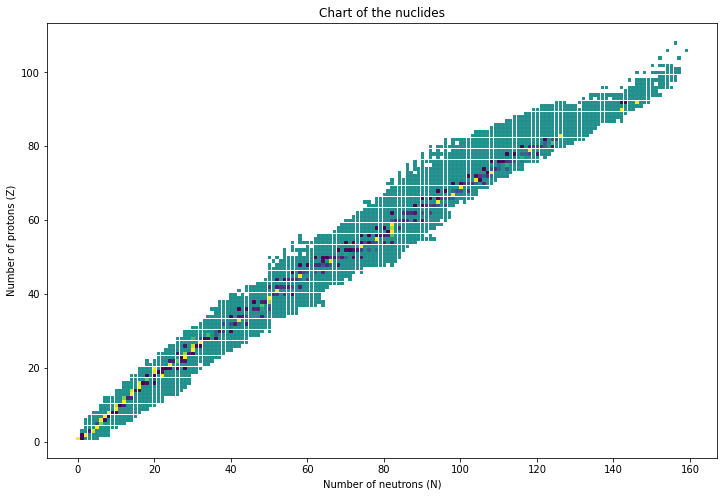

In [4]:
import matplotlib.pyplot as plt
from matplotlib import colors
xyc = []
for name, base in nuclideBases.byName.items():
    if not base.a:
        continue
    xyc.append((base.a-base.z, base.z, base.abundance or 0.5))
x,y,c = zip(*xyc)
plt.figure(figsize=(12,8))
plt.scatter(x,y,c = c, marker='s', s=6)
plt.title('Chart of the nuclides')
plt.xlabel('Number of neutrons (N)')
plt.ylabel('Number of protons (Z)')
plt.show()

Behold.